#### 1 . Input Layer --CNN / Dense Layer / Convulated Layer 

<h4> i. Relu
ii. Polling Layer
iii. Upsamling
  
i. batchNormalization ii. Dropout  Layer 

2 . Hidden Layer --NN
3. Output Layer --FCNN

<h4>

1. Tensorflow
2. Pytroch
3. MaxNet

1. Numpy 
2. Pandas
3. pillow
4. OpenCV
5. Scikit Learn

i. Plotly
ii. matplotlib
iii. Seaborn
iv. D3.js

vi . NLTK

<h4>Importing Library<h4>

```python

for i in range(10):
    print(i)
print("This is For Loop")
```

In [1]:
# import tensorflow.compat.v1 as tf 
import tensorflow as tf 
# This section for algebric analysis
import numpy as np
# This section for visualization 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### help(warning.filterwarnings)

#### value =dict({"product_pricel" : 10,
####           "product_price2" :100})

Say for example
```(1000, 10)
value = dict({"product_price1" : 10,
"product_price2" : 100})
```

1. Random : import random as rnd
2. Numpy: import numpy.random as npr
3. Tensorflow: import tensorflow.random

# help(warnings.filterwarnings)

In [2]:
class NeuralNetowrk:
    def __init_(self, layers):
        self.layers = layers
        self.L = len(layers)

        self.number_feature = layers[0]
        self.number_class = layers[-1]

        self.w = {}
        self.b = {}

        self.dw = {}
        self.db = {}

        self.setup()
    def setup(self):
        for i in range(i, self.L):
            self.W[i] = tf.variable(tf.random.normal(shape = (self.layers[i], self.layers[i-1])))
            self.b[i] = tf.Variable(tf.random.normal(shape = (self.layers[i], 1))) 



Way of create dtype

1. dtype ="float32"
2. dtype=np.float32
3. dtype=tf.float32
4. dtype=torch.float32



In [3]:
# Forward Propagation 

class NeuralNetowrk(NeuralNetowrk):
    def forwardPass(self, A):
        A = tf.convert_to_tensor(A, dtype= float)
        for i in range(1, self.L):
            Z = tf.matmul(A, tf.transpose(self.W[i])) + tf.transpose(self.b[i])
            if i!= self.L-1:
                A = tf.nn.relu(Z)
            else:
                A = Z
        return A

#### Say for example of (A, Y) and (Y, A)
```
def summ(a, b):
    summa = a-b
    return summa
summ(4, 5)
```

In [4]:
# We will use this section for computing loss function and Upgrading the previous parameters
class NeuralNetowrk(NeuralNetowrk):
    def compute_loss(self, A, Y):
        return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(Y, A))
        
    
    def upgrade_parameters(self, lr):
        for j in range(1, self.L):
            self.W[j].assing_sub(lr*self.dw[j])
            self.b[j].assing_sub(lr*self.db[j])

In [ ]:
# 0 index ---> cats
# 1 index ----> dogs
np.argmax([0.12, 0.09])

In [5]:

v1=np.argmax([0.2, 0.9, 0.5])
v2=np.argmax([0.12, 0.09])
print(v1)
print(v2)

1
0


In [6]:
class NeuralNetowrk(NeuralNetowrk):
    def predict(self, x):
        A = self.forwardPass(x)
        return tf.argmax(tf.nn.softmax(A), axis = 1)

    def info(self):
        num_params = 0
        for i in range(1, self.L):
            num_params += self.W[i].shape[0] * self.W[i].shape[1]
            num_params += self .b[i].shape[0]

        print("Number of Feature: {}".format(self.number_feature))
        print("Total Number of class is: {}".format(self.number_class))

        print("Hidden Layer information is: ")
        for j in range (1, self.L -1):
            print("Layer: {}, Units {}". format(num_params))

        print("Total Number of parameters : {}".format(num_params))



In [ ]:
# history = model.fit()

In [7]:
class NeuralNetowrk(NeuralNetowrk):
    def training_on_batch(self, x, y, lr):
        x = tf.convert_to_tensor(x, dtype=tf.float32)
        y = tf.convert_to_tensor(y, dtype=tf.float32)
        
        with tf.GradientTape(persistent=True) as tape:
            A = self.forwardPass(x)
            loss = self.compute_loss(A, y)

        for key in self.W.keys():
            self.dw[key] = tape.gradient(loss, self.W[key])
            self.db[key] = tape.gradient(loss, self.b[key])
        
        del tape

        self.upgrade_parameters(lr)
        return loss.numpy()
        

In [8]:
# Training start
class NeuralNetowrk(NeuralNetowrk):
    def train(self, x_train, y_train, x_test, y_test, epochs, step_per_epochs, batch_size, lr):
        history = {"val_loss": [],
                    'train_loss':[],
                    'val_acc':[]}    
        for e in range(0, epochs):
            training_loss_epochs = 0.0
            print("Epochs {}".format(e), end = " | ")
            for i in range(step_per_epochs):
                x_batch = x_train[i*batch_size : (i+1)*batch_size]
                y_batch = y_train[i*batch_size : (i+1)*batch_size]
                batch_loss = self.training_on_batch(x_batch, lr)
                epoch_loss_train += batch_loss

                if i %int(step_per_epochs/10) == 0:
                    print(end =" . ")

            history['train_loss'].append(epoch_loss_train/step_per_epochs)
            valA = self.forwardPass(x_test)
            history['val_loss'].append(self.compute_loss(y_test, valA).numpy())

            valuPr = self.predict(x_test)
            history['val_acc'].append(np.mean(np.argmax(y_test, axis=1) == valuPr.numpy()))
            print("Value Accuracy: ", history['val_acc'][-1])
        # here, we will get  training information
        return history

#### 12//5 if use double slash then you will get integer number  
```
a = np.array([1, 2 , 3])
b = np.array([1, 4, 3])
a == b
```


In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

```
# for example
for i, j in enumerate(range(5, 11)):
    print(i, j)

```

In [9]:
def loadDatasets():
    (x_train, y_train), (x_test, y_test) =tf.keras.datasets.mnist.load_data()
    x_train = np.reshape(x_train, (x_train.shape[0], 784))/255.0
    y_train=tf.keras.utils.to_categorical(y_train)
    x_test= np.reshape(x_test, (x_test.shape[0], 784))/255.0
    y_test= tf.keras.utils.to_categorical(y_test)
    print("X Train Datasets Shape: {}".format(x_train.shape))
    print("Y test Data {}".format(y_test))
    print("Len of Y test Datasets: {}".format(len(y_test[0])))
    print("Unique value is : {}".format(np.unique(y_test[0])))

    return (x_train, y_train), (x_test, y_test)

def plot_random_sample(x, y, p = None):
    indicies = np.random.choice(range(0, x.shape[0]), 10)
    y = np.argmax(y, axis = 1)
    if p is None:
        p = y

    plt.figure(figsize=(10, 4))
    for i, index in enumerate(indicies):
        plt.subplot(2, 5, i+1)
        plt.imshow(x[index].reshape((28, 28)), cmap = 'binary')
        plt.xticks([])
        plt.yticks([])
        plt.gray()

        if y[index] == p[index]:
            col = 'g'
        else:
            col = 'r'
        plt.xlabel(str(p[index]), color = col)
    return plt
    

In [10]:
(x_train, y_train), (x_test, y_test) = loadDatasets()

X Train Datasets Shape: (60000, 784)
Y test Data [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Len of Y test Datasets: 10
Unique value is : [0. 1.]


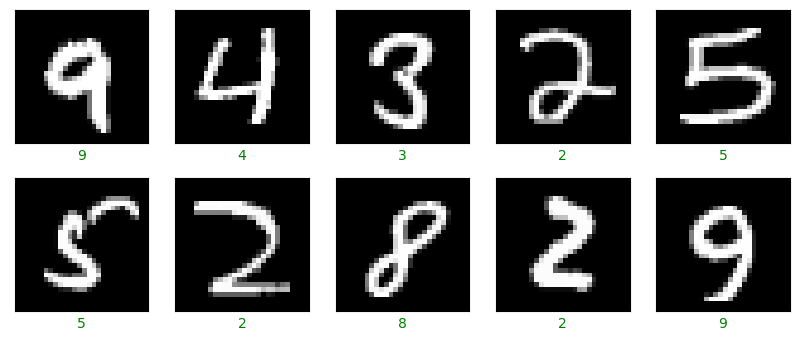

In [11]:
plot_random_sample(x_train, y_train).show()